## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [5]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

=> Row with name speeding contains some null values

## Question 2. Remove any rows that has null or NA

In [7]:
# show general info before removing 
print("Data Info Before Removing Null Values: {}".format(crash.shape))

# remove null values
crash.dropna(inplace=True)

# show general info after removing 
print("Data Info After Removing Null Values: {}".format(crash.shape))

# check for null again to make sure that we 
# don't have any null values somewhere else
print("\n\nChecking again for null values in the data set:")
crash.isnull().any()

Data Info Before Removing Null Values: (52, 10)
Data Info After Removing Null Values: (51, 10)


Checking again for null values in the data set:


accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

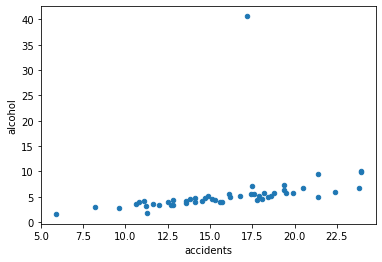

In [8]:
crash.plot.scatter(x = 'accidents', y = 'alcohol')

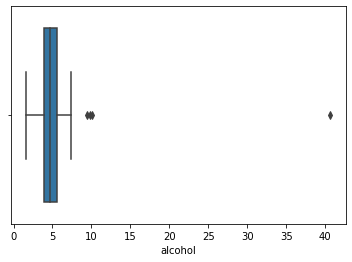

In [9]:
sns.boxplot(x=crash['alcohol'])

=> both graphs demonstrate that there is an outlier. Normal values do not exceed 15

## Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [10]:
print("General Info of the Table Content Before Removing The Outlier: {}".format(crash.shape))

print("\nThe whole data for the outlier in alcohol column:")
crash[crash.alcohol > 15]

General Info of the Table Content Before Removing The Outlier: (51, 10)

The whole data for the outlier in alcohol column:


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
39,17.2,7.1,40.642,17.472,16.016,905.99,153.86,PR,Territory,Territory


In [11]:
print("Removing the outlier")
crash = crash[crash.alcohol < 15]
print("General Info of the Table Content After Removing The Outlier: {}".format(crash.shape))

Removing the outlier
General Info of the Table Content After Removing The Outlier: (50, 10)


## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [12]:
sql = "SELECT count(*), accidents, region, avg(speeding) FROM crash WHERE region = 'Northeast'"
df = ps.sqldf(sql)
df

,count(*),accidents,region,avg(speeding)
0,8,10.8,Northeast,4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [13]:
sql = "SELECT region, avg(alcohol) FROM crash GROUP BY region"
df = ps.sqldf(sql)
df

,region,avg(alcohol)
0,Midwest,4.996917
1,Northeast,3.980500
2,South,5.414647
3,West,4.754077


## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [14]:
sql = "SELECT division, count(accidents), avg(speeding), min(speeding), max(speeding) FROM crash GROUP BY division"
df = ps.sqldf(sql)
df

,division,count(accidents),avg(speeding),min(speeding),max(speeding)
0,East North Central,5,4.106600,3.384,4.968
1,East South Central,4,4.533250,2.640,7.332
2,Middle Atlantic,2,5.446000,1.792,9.100
3,Mountain,8,5.812250,3.496,8.346
4,New England,6,4.084333,1.886,5.738
5,Pacific,5,5.949400,4.200,9.450
6,South Atlantic,9,5.030444,2.006,9.082
7,West North Central,7,4.293429,1.937,6.923
8,West South Central,4,6.333750,4.032,7.760


## Question 8. Answer Question 7 but use Pandas functions

In [15]:
crash.groupby('division')['speeding'].agg(['count','mean','min', 'max'])

,count,mean,min,max
division,,,,
East North Central,5,4.106600,3.384,4.968
East South Central,4,4.533250,2.640,7.332
Middle Atlantic,2,5.446000,1.792,9.100
Mountain,8,5.812250,3.496,8.346
New England,6,4.084333,1.886,5.738
Pacific,5,5.949400,4.200,9.450
South Atlantic,9,5.030444,2.006,9.082
West North Central,7,4.293429,1.937,6.923
West South Central,4,6.333750,4.032,7.760


## Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [16]:
print("Stadard Deviation and Skew for accidents, speeding and alcohol in each region")
crash.groupby('region')[['accidents','speeding','alcohol']].agg(['std','skew'])

Stadard Deviation and Skew for accidents, speeding and alcohol in each region


accidents            speeding             alcohol          
                std      skew       std      skew       std      skew
region                                                               
Midwest    3.588988  0.950845  1.537451  0.121197  1.824432  2.093467
Northeast  3.077453  0.777587  2.327773  1.051666  0.872950  0.764250
South      4.537037 -1.125839  2.220711  0.172035  1.773576  0.330988
West       3.325118  0.064819  1.803138  0.697441  1.910356  1.159752

In [17]:
print("Kurtosis for accidents, speeding and alcohol in each region")
crash.groupby(['region'])[['accidents','speeding','alcohol']].apply(pd.DataFrame.kurtosis)

Kurtosis for accidents, speeding and alcohol in each region


,accidents,speeding,alcohol
region,,,
Midwest,2.067092,-0.737061,5.597372
Northeast,0.726713,1.763520,0.890501
South,1.860064,-1.327699,2.125568
West,-1.048692,-0.465455,2.219220


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

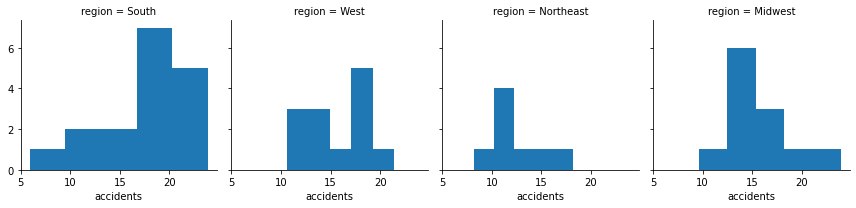

In [18]:
g = sns.FacetGrid(crash, col = 'region')
g = g.map(plt.hist, 'accidents', bins = 5)

## Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

In [19]:
'''
another way to find skew for each region
calculating it again for convininece of analysis
'''
crash.groupby(['region'])['accidents'].skew()

region
Midwest      0.950845
Northeast    0.777587
South       -1.125839
West         0.064819
Name: accidents, dtype: float64

In [20]:
'''
aggregated way for accidents only to find kurtosis for each region
calculating it again for convininece of analysis
'''
crash.groupby(['region'])['accidents'].apply(pd.DataFrame.kurtosis)

region
Midwest      2.067092
Northeast    0.726713
South        1.860064
West        -1.048692
Name: accidents, dtype: float64

According to the data obtained above, both results for kurtosis and skew illustrate that there are more outliers (more values above average among other regions) in the Midwest region.

As for South region, the skew is negative whereas the kurtosis is positive. That implies that there are more outliers with smaller values rather than in other 3 regions.

Approximately the opposite situation taking place in the West, skew is positive, while kurtosis is negative. This situation indicates a fewer number of outliers than normal distribution.

And for Northeast both skew and kurtosis are positive. There are more outliers having the bigger values than in other 2 regions, South and West.



## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [21]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


Based on the correlation, alcohol has the highest correlation with accidents, that means alsohol has the higher impact among other factors when it comes to accident. Speeding is taking the second place to cause the accident and only after it ins_premium goes.

### Now Load a different dataset (MPG dataset number 3)

In [22]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [23]:
print(mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")

mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


### Type your code here to fix the missing values by imputing value from the mean

In [24]:
print("Mean Value for mpg: {}".format(mpg['mpg'].mean()))
print("Mean Value for horsepower: {}".format(mpg['horsepower'].mean()))
print("Mean Value for weight: {}\n".format(mpg['weight'].mean()))


newval = mpg['mpg'].fillna(mpg['mpg'].mean())
# update the series with the newval
mpg['mpg'] = newval

newval = mpg['horsepower'].fillna(mpg['horsepower'].mean())
# update the series with the newval
mpg['horsepower'] = newval

newval = mpg['weight'].fillna(mpg['weight'].mean())
# update the series with the newval
mpg['weight'] = newval


print(mpg.describe())

# check for leftover null values
mpg.isnull().any()

Mean Value for mpg: 23.64554455445545
Mean Value for horsepower: 105.59398496240601
Mean Value for weight: 3020.866336633663

              mpg   cylinders  displacement  horsepower        weight  \
count  405.000000  405.000000    405.000000  405.000000    405.000000   
mean    23.645545    5.493827    194.504938  105.593985   3020.866337   
std      8.455124    1.847687    105.231828   42.002541   1280.925042   
min      9.000000    3.000000     68.000000   46.000000   1613.000000   
25%     17.000000    4.000000    105.000000   76.000000   2228.000000   
50%     23.000000    4.000000    151.000000   95.000000   2807.000000   
75%     29.000000    8.000000    267.000000  125.000000   3613.000000   
max     90.000000   20.000000    455.000000  450.000000  22340.000000   

       acceleration  model_year  
count    405.000000  405.000000  
mean      15.521481   75.987654  
std        2.792380    3.746595  
min        8.000000   70.000000  
25%       13.800000   73.000000  
50%       15

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool